In [1]:
from raptor import Raptor, Analysis
import numpy as np
import cv2 as cv
import matplotlib

In [2]:
a_rgb = Analysis('07-01-2022_rgb1.data', path="data/")

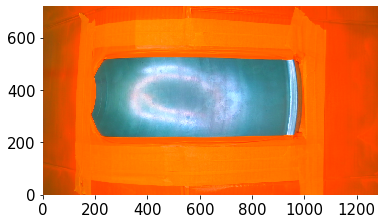

In [3]:
bgr_array = np.array(a_rgb.data['data'][0]['image'])
bgr_array = bgr_array.astype('float32') / 255
rgb_array = cv.cvtColor(bgr_array, cv.COLOR_BGR2RGB)
matplotlib.pyplot.imshow(rgb_array)

In [4]:
hsv_array = cv.cvtColor(rgb_array, cv.COLOR_RGB2HSV)
#matplotlib.pyplot.imshow(hsv_array)
hsv_array[:1]

array([[[24.087587  ,  0.9133332 ,  0.5882353 ],
        [24.347822  ,  0.91999984,  0.5882353 ],
        [26.086952  ,  0.9387753 ,  0.5764706 ],
        ...,
        [19.999998  ,  0.9999999 ,  0.8117647 ],
        [19.710142  ,  0.9999999 ,  0.8117647 ],
        [19.710142  ,  0.9999999 ,  0.8117647 ]]], dtype=float32)

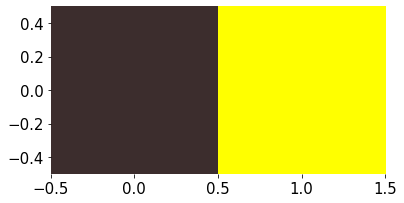

In [5]:
lower_orange = np.array([0/360, 60/255, 60/255])
upper_orange = np.array([60/360, 255/255, 255/255])
matplotlib.pyplot.imshow([[matplotlib.colors.hsv_to_rgb(lower_orange), matplotlib.colors.hsv_to_rgb(upper_orange)]])

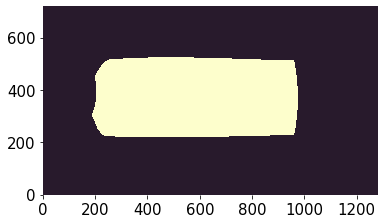

In [6]:
lower_orange = np.array([0, 60/255, 60/255])
upper_orange = np.array([80, 255/255, 255/255])

mask = cv.inRange(hsv_array, lower_orange, upper_orange)
mask = ~mask
matplotlib.pyplot.imshow(mask)

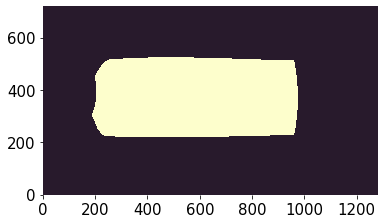

In [7]:
nb_components, output, stats, centroids = cv.connectedComponentsWithStats(mask, connectivity=8)
sizes = stats[1:, -1]; nb_components = nb_components - 1
min_size = 50000
clean_mask = np.zeros((output.shape))
for i in range(0, nb_components):
    if sizes[i] >= min_size:
        clean_mask[output == i + 1] = 255
matplotlib.pyplot.imshow(clean_mask)

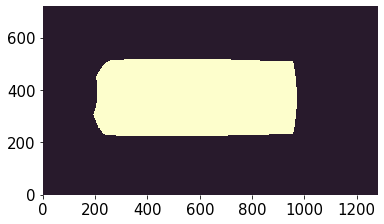

In [8]:
eroded_mask = cv.erode(clean_mask,np.ones((5,5),np.uint8),iterations = 2).astype(np.uint8)
matplotlib.pyplot.imshow(eroded_mask)

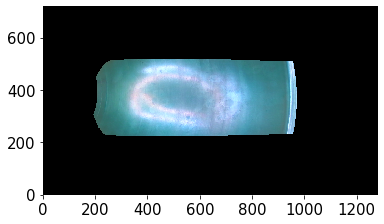

In [9]:
res = cv.bitwise_and(rgb_array, rgb_array, mask=eroded_mask)
matplotlib.pyplot.imshow(res)

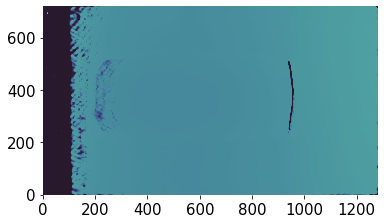

In [10]:
d = Analysis('07-01-2022_depth1.data', path="data/")
depth_array = np.array(d.data['data'][0]['image'])
matplotlib.pyplot.imshow(depth_array)

In [28]:
list(depth_array[400][depth_array[400] != 0])

[5,
 10,
 21,
 35,
 40,
 45,
 40,
 32,
 34,
 34,
 42,
 53,
 69,
 72,
 88,
 93,
 106,
 156,
 169,
 188,
 177,
 166,
 142,
 153,
 192,
 194,
 194,
 194,
 194,
 194,
 191,
 194,
 193,
 193,
 193,
 193,
 192,
 192,
 181,
 179,
 160,
 165,
 183,
 170,
 174,
 166,
 184,
 187,
 186,
 189,
 189,
 189,
 188,
 188,
 188,
 188,
 188,
 188,
 187,
 187,
 187,
 187,
 186,
 186,
 186,
 186,
 186,
 185,
 185,
 185,
 185,
 185,
 185,
 185,
 184,
 184,
 184,
 184,
 184,
 184,
 184,
 184,
 184,
 184,
 184,
 184,
 184,
 183,
 183,
 183,
 183,
 183,
 178,
 133,
 147,
 174,
 177,
 177,
 162,
 142,
 129,
 131,
 146,
 160,
 160,
 162,
 160,
 162,
 159,
 169,
 171,
 174,
 166,
 171,
 176,
 173,
 171,
 176,
 175,
 171,
 168,
 163,
 170,
 166,
 163,
 160,
 155,
 160,
 167,
 160,
 162,
 160,
 155,
 169,
 162,
 174,
 171,
 169,
 161,
 168,
 168,
 173,
 171,
 175,
 175,
 173,
 175,
 175,
 173,
 173,
 168,
 165,
 168,
 170,
 158,
 160,
 163,
 170,
 172,
 167,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 17

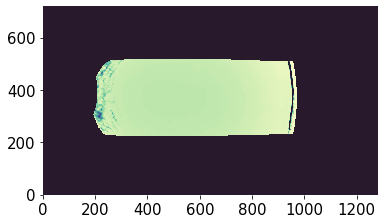

In [11]:
res_depth = cv.bitwise_and(depth_array, depth_array, mask=eroded_mask)
matplotlib.pyplot.imshow(res_depth)

In [23]:
td = res_depth[400][res_depth[400] != 0]

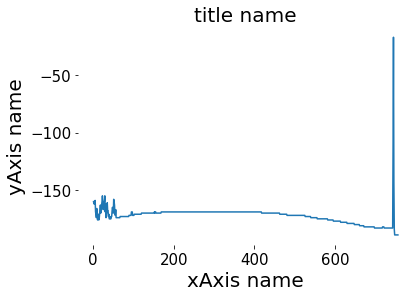

In [24]:
matplotlib.pyplot.plot(np.arange(1, len(td)+1),-td)
matplotlib.pyplot.title('title name')
matplotlib.pyplot.xlabel('xAxis name')
matplotlib.pyplot.ylabel('yAxis name')
matplotlib.pyplot.show()

In [165]:
def crop_image(bgr_analysis, depth_analysis, lower_mask_color=None, upper_mask_color=None, min_blob_size=50000, erosion_iterations=2):
    if lower_mask_color is None:
        lower_mask_color = np.array([0, 60/255, 60/255])
    if upper_mask_color is None:
        upper_mask_color = np.array([80, 255/255, 255/255])
    
    bgr_array = np.array(bgr_analysis.data['data'][0]['image'])
    bgr_array = bgr_array.astype('float32') / 255
    rgb_array = cv.cvtColor(bgr_array, cv.COLOR_BGR2RGB)
    hsv_array = cv.cvtColor(rgb_array, cv.COLOR_RGB2HSV)
    ########################################################
    mask = cv.inRange(hsv_array, lower_mask_color, upper_mask_color)
    mask = ~mask
    
    nb_components, output, stats, centroids = cv.connectedComponentsWithStats(mask, connectivity=8)
    sizes = stats[1:, -1]
    print(sizes)
    nb_components = nb_components - 1
    clean_mask = np.zeros((output.shape))
    for i in range(0, nb_components):
        if sizes[i] >= min_blob_size:
            clean_mask[output == i + 1] = 255

    eroded_mask = cv.erode(clean_mask,np.ones((5,5),np.uint8),iterations = erosion_iterations).astype(np.uint8)
    ########################################################
    result_rgb = cv.bitwise_and(rgb_array, rgb_array, mask=eroded_mask)
    
    depth_array = np.array(depth_analysis.data['data'][0]['image'])
    result_depth = cv.bitwise_and(depth_array, depth_array, mask=eroded_mask)
    
    return result_rgb, result_depth
    
def print_image_array(array):
    matplotlib.pyplot.imshow(array)

In [167]:
rgb2 = Analysis('07-01-2022_rgb2.data', path="data/")
depth2 = Analysis('07-01-2022_depth2.data', path="data/")
result_rgb2, result_depth2 = crop_image(rgb2, depth2, min_blob_size = 60000)

[ 50546     47     27      3      1     10      7      2 212955      2
      1      1      2     11]


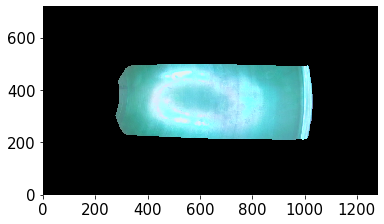

In [168]:
print_image_array(result_rgb2)

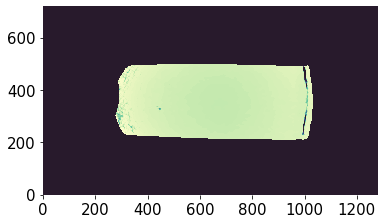

In [169]:
print_image_array(result_depth2)